In [1]:
# %load CommonFunctions.py


# # COMMON ATOMIC AND ASTRING FUNCTIONS

# In[14]:

############### One String Pulse with width, shift and scale #############
def StringPulse(String1, t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = String1(x)
    res = d + res * c
    return res


# In[16]:


###### Atomic String Applied to list with width, shift and scale #############
def String(String1, x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(StringPulse(String1, x[i], a, b, c, d))
    return res


# In[17]:


###### Summation of two lists #############
def Sum(x1: list, x2: list) -> list:
    res = []
    for i in range(len(x1)):
        res.append(x1[i] + x2[i])
    return res


# In[18]:


##########################################################
##This script introduces Atomic Function 
################### One Pulse of atomic function
def up1(x: float) -> float:
    #Atomic function table
    up_y = [0.5, 0.48, 0.460000017,0.440000421,0.420003478,0.400016184, 0.380053256, 0.360139056, 0.340308139, 0.320605107,
           0.301083436, 0.281802850, 0.262826445, 0.244218000, 0.226041554, 0.208361009, 0.191239338, 0.174736305, 
           0.158905389, 0.143991189, 0.129427260, 0.115840866, 0.103044024, 0.9110444278e-01, 0.798444445e-01, 0.694444445e-01, 
           0.598444445e-01, 0.510444877e-01, 0.430440239e-01, 0.358409663e-01, 0.294282603e-01, 0.237911889e-01, 0.189053889e-01, 
           0.147363055e-01, 0.112393379e-01, 0.836100883e-02, 0.604155412e-02, 0.421800000e-02, 0.282644445e-02, 0.180999032e-02, 
           0.108343562e-02, 0.605106267e-03, 0.308138660e-03, 0.139055523e-03, 0.532555251e-04, 0.161841328e-04, 0.347816874e-05, 
           0.420576116e-05, 0.167693347e-07, 0.354008603e-10, 0]
    up_x = np.arange(0.5, 1.01, 0.01)

    res = 0.
    if ((x >= 0.5) and (x <= 1)):
        for i in range(len(up_x) - 1):
            if (up_x[i] >= x) and (x < up_x[i+1]):
                N1 = 1 - (x - up_x[i])/0.01
                res = N1 * up_y[i] + (1 - N1) * up_y[i+1]
                return res
    return res


# In[19]:
############### Atomic Function Pulse with width, shift and scale #############
def pulse(up1, t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    res = 0.
    if (x >= 0.5) and (x <= 1):
        res = up1(x)
    elif (x >= 0.0) and (x < 0.5):
        res = 1 - up1(1 - x)
    elif (x >= -1 and x <= -0.5):
        res = up1(-x)
    elif (x > -0.5) and (x < 0):
        res = 1 - up1(1 + x)
    res = d + res * c
    return res

############### Atomic Function Applied to list with width, shift and scale #############
def up(up1, x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(pulse(up1, x[i], a, b, c, d))
    return res

############### Atomic String #############
def AString1(x: float) -> float:
    res = 1 * (pulse(up1, x/2.0 - 0.5) - 0.5)
    return res

############### Atomic String Pulse with width, shift and scale #############
def AStringPulse(t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = AString1(x)
    res = d + res * c
    return res

###### Atomic String Applied to list with width, shift and scale #############
def AString(x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(AStringPulse(x[i], a, b, c, d))
    return res



In [2]:
import numpy as np
import pylab as pl

In [3]:
x = np.arange(-2.0, 2.0, 0.01)

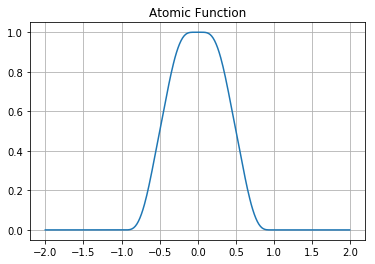

In [4]:
pl.title('Atomic Function')
pl.plot(x, up(up1, x), label='Atomic Function')
pl.grid(True)
pl.show()

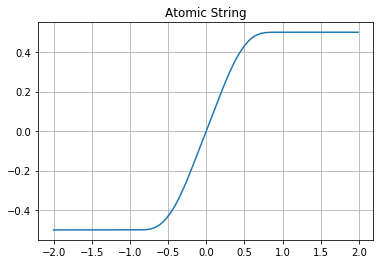

In [5]:
pl.title('Atomic String')
pl.plot(x, String(AString1, x, 1.0, 0, 1, 0), label='Atomic String')
pl.grid(True)
pl.show()

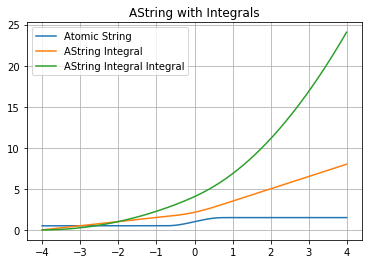

In [6]:
x = np.arange(-4.0, 4.0, 0.01)
dx = x[1] - x[0]

pl.title('Atomic String')
pl.plot(x, String(AString1, x, 1., 0., 1., 1.), label='Atomic String')

IntAString = np.cumsum(String(AString1, x, 1., 0., 1., 1.)) * dx
pl.plot(x, IntAString, label='AString Integral')

Int2AString = np.cumsum(IntAString) * dx
pl.plot(x, Int2AString, label='AString Integral Integral')

pl.title('AString with Integrals')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

## Summary and Observations

1) AString Integrals provide smooth curly connections between two straight lines

2) Further integrals provide smooth curly connections between parabolas!!

3) In general, AString integrals can provide smooth connections between any similar shapes!!!

In [7]:
AString1(0)

0.0

In [11]:
v=[0,0.1,0.25,0.5,0.9,1]
for i in v:
    print(AString1(i))

0.09998381599999995